## Inequality in Education: Analyzing How Socioeconomic Conditions and Student–Teacher Ratios Affect Student Achievement

### Introduction:</br>

Unequal access to education in the United States leads to unequal outcomes for students. Disparities in educational opportunity arise from multiple factors, including government policies, school funding and choice, family wealth, parental education, implicit bias related to race or ethnicity, and unequal access to school resources. These inequities not only influence academic performance but also contribute to broader societal challenges such as income inequality and higher incarceration rates.

This project explores inequality in educational opportunities across U.S. high schools by examining how socioeconomic factors influence student achievement. Specifically, it analyzes the relationship between  median household income, unemployment rate, percentage of students eligible for free or reduced-price lunch, proportion of married parents, and parental education levels and average student performance on standardized college entrance exams like the ACT and SAT. The goal is to identify patterns and disparities that reveal how varying socioeconomic conditions contribute to differences in academic outcomes, offering insights into the broader issue of educational inequality in the United States.

In addition, the project investigates whether the student-to-teacher ratio impacts average ACT scores. It evaluates if schools with lower student-to-teacher ratios which typically indicate smaller class sizes and greater individual attention are associated with higher student performance, thereby extending the understanding of how school-level resources affect educational outcomes.



### Data Description:

Data Source & Links:</br>
-[National Center for Education Statistics](https://nces.ed.gov/ccd/pubschuniv.asp)</br>
-[Edgap.org](https://www.edgap.org/#5/37.892/-95.977)




This project combines data from the [EdGap dataset](../data/Edgap_data.csv) and the National Center for Education Statistics (NCES) Public Elementary/Secondary School Universe Survey Data (2016–2017) ([NCES School Information](https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=1)) to analyze how socioeconomic conditions affect student achievement in U.S. high schools.

The [EdGap dataset](../data/Edgap_data.csv) provides school-level academic and socioeconomic information such as NCESSH id, average ACT and SAT scores, median household income, unemployment rate, percentage of students eligible for free or reduced-price lunch, proportion of married parents and parental education levels.

The [NCES School Information](https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=1) includes institutional details such as school year, NCESSH id, state name, ZIP code, school type, grade level, and charter school status, offering a clearer understanding of the structural and geographic characteristics of each school.

The data for staffvcount and student count datasets were downloaded from National Center for Education Statistics (NCES) website. [Staff count](https://drive.google.com/file/d/126RI52Z1GPcnshE_0I-nYmyQdBh8lf0U/view?usp=drive_link) contains the school level count of teachers and the [Student count](https://drive.google.com/file/d/1szims8J8QZbafLDmuxogZlrFVA5Xb9Vr/view?usp=drive_link) contains the school level count of students.

The data was processed to subset the datasets, remove unnecessary columns, and rename the remaining columns for clarity. All the 4 datasets  were then combined into a single DataFrame, and missing values were handled  by imputation. This cleaned and consolidated dataset was used for the Exploratory Data analysis and Modeling






### Data Cleaning and Preprocessing

#### Import libraries

In [124]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style('whitegrid')

### Load The Data Sets

#### Load the EdGap Data sets

In [125]:
# Read in the data
edgap= pd.read_excel('../data/Edgap_data.xlsx',dtype={'NCESSCH School ID': object}) 
edgap.head()

/opt/anaconda3/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,NCESSCH School ID,CT Unemployment Rate,CT Pct Adults with College Degree,CT Pct Childre In Married Couple Family,CT Median Household Income,School ACT average (or equivalent if SAT score),School Pct Free and Reduced Lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


#### Load the school information Data set

In [126]:
school_information= pd.read_csv('https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=1',encoding="unicode_escape")
school_information.head()

/var/folders/9v/5yh40h_55xv50xhdsn75mt000000gn/T/ipykernel_31244/2543119220.py:1: DtypeWarning: Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  school_information= pd.read_csv('https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=1',encoding="unicode_escape")


,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,ST_SCHID,NCESSCH,SCHID,MSTREET1,MSTREET2,MSTREET3,MCITY,MSTATE,MZIP,MZIP4,LSTREET1,LSTREET2,LSTREET3,LCITY,LSTATE,LZIP,LZIP4,PHONE,WEBSITE,SY_STATUS,SY_STATUS_TEXT,UPDATED_STATUS,UPDATED_STATUS_TEXT,EFFECTIVE_DATE,SCH_TYPE_TEXT,SCH_TYPE,RECON_STATUS,OUT_OF_STATE_FLAG,CHARTER_TEXT,CHARTAUTH1,CHARTAUTHN1,CHARTAUTH2,CHARTAUTHN2,NOGRADES,G_PK_OFFERED,G_KG_OFFERED,G_1_OFFERED,G_2_OFFERED,G_3_OFFERED,G_4_OFFERED,G_5_OFFERED,G_6_OFFERED,G_7_OFFERED,G_8_OFFERED,G_9_OFFERED,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0020,1.000020e+10,100277.0,P O Box 9486,NaN,NaN,Birmingham,AL,35220,NaN,1000 Industrial School Road,NaN,NaN,Birmingham,AL,35220,NaN,(205)680-8574,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0050,1.000020e+10,101667.0,P O Box 66,NaN,NaN,Mt Meigs,AL,36057,NaN,1601 County Rd. 57,NaN,NaN,Prattville,AL,36067,NaN,(334)215-3850,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0060,1.000020e+10,101670.0,P O Box 66,NaN,NaN,Mt Meigs,AL,36057,NaN,2109 Bashi Rd Bldg 509,NaN,NaN,Thomasville,AL,36784,NaN,(334)215-3850,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0030,1.000020e+10,101705.0,P O Box 66,NaN,NaN,Mount Meigs,AL,36057,NaN,1000 Industrial School Road,NaN,NaN,Mount Meigs,AL,36057,NaN,(334)215-6039,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0040,1.000020e+10,101706.0,8950 Roebuck Blvd,NaN,NaN,Birmingham,AL,35206,NaN,8950 Roebuck Blvd,NaN,NaN,Birmingham,AL,35206,NaN,(205)838-4981,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported


#### Load the Staff dataset

The link to the original dataset is provided below. since the file size is large I was unable to upload in github . I have kept only the relevant columns required and loaded the file.
https://drive.google.com/file/d/126RI52Z1GPcnshE_0I-nYmyQdBh8lf0U/view?usp=drive_link

In [127]:
school_staff=pd.read_csv('../data/staff.csv',encoding="unicode_escape")
school_staff.columns = school_staff.columns.str.replace('ï»¿', '', regex=False) 
school_staff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100062 entries, 0 to 100061
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   NCESSCH   100062 non-null  int64  
 1   TEACHERS  96438 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 1.5 MB


#### Load the Student dataset

The link to the original dataset is provided below. Since the file size is large I was unable to upload in github . I have kept only the relevant columns required and loaded the file.
https://drive.google.com/file/d/1szims8J8QZbafLDmuxogZlrFVA5Xb9Vr/view?usp=drive_link

In [128]:

school_members=pd.read_csv('../data/student.csv',encoding="unicode_escape")
school_members.columns = school_members.columns.str.replace('ï»¿', '', regex=False) 
school_members.head()

,NCESSCH,STUDENT_COUNT,GRADE
0,10000200277,NaN,Grade 10
1,10000200277,NaN,Grade 10
2,10000200277,NaN,Grade 10
3,10000200277,NaN,Grade 10
4,10000200277,NaN,Grade 10


#### We now explore contents of the data sets. We start by looking at the head of each dataframes.This will let us see the names of the columns and few values for each of the columns

In [129]:
edgap.head()

,NCESSCH School ID,CT Unemployment Rate,CT Pct Adults with College Degree,CT Pct Childre In Married Couple Family,CT Median Household Income,School ACT average (or equivalent if SAT score),School Pct Free and Reduced Lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [130]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   object 
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


In [131]:
pd.set_option('display.max_columns', None)  
school_information.head()

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,ST_SCHID,NCESSCH,SCHID,MSTREET1,MSTREET2,MSTREET3,MCITY,MSTATE,MZIP,MZIP4,LSTREET1,LSTREET2,LSTREET3,LCITY,LSTATE,LZIP,LZIP4,PHONE,WEBSITE,SY_STATUS,SY_STATUS_TEXT,UPDATED_STATUS,UPDATED_STATUS_TEXT,EFFECTIVE_DATE,SCH_TYPE_TEXT,SCH_TYPE,RECON_STATUS,OUT_OF_STATE_FLAG,CHARTER_TEXT,CHARTAUTH1,CHARTAUTHN1,CHARTAUTH2,CHARTAUTHN2,NOGRADES,G_PK_OFFERED,G_KG_OFFERED,G_1_OFFERED,G_2_OFFERED,G_3_OFFERED,G_4_OFFERED,G_5_OFFERED,G_6_OFFERED,G_7_OFFERED,G_8_OFFERED,G_9_OFFERED,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0020,1.000020e+10,100277.0,P O Box 9486,NaN,NaN,Birmingham,AL,35220,NaN,1000 Industrial School Road,NaN,NaN,Birmingham,AL,35220,NaN,(205)680-8574,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0050,1.000020e+10,101667.0,P O Box 66,NaN,NaN,Mt Meigs,AL,36057,NaN,1601 County Rd. 57,NaN,NaN,Prattville,AL,36067,NaN,(334)215-3850,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0060,1.000020e+10,101670.0,P O Box 66,NaN,NaN,Mt Meigs,AL,36057,NaN,2109 Bashi Rd Bldg 509,NaN,NaN,Thomasville,AL,36784,NaN,(334)215-3850,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0030,1.000020e+10,101705.0,P O Box 66,NaN,NaN,Mount Meigs,AL,36057,NaN,1000 Industrial School Road,NaN,NaN,Mount Meigs,AL,36057,NaN,(334)215-6039,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0040,1.000020e+10,101706.0,8950 Roebuck Blvd,NaN,NaN,Birmingham,AL,35206,NaN,8950 Roebuck Blvd,NaN,NaN,Birmingham,AL,35206,NaN,(205)838-4981,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported


In [132]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

In [133]:
school_staff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100062 entries, 0 to 100061
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   NCESSCH   100062 non-null  int64  
 1   TEACHERS  96438 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 1.5 MB


In [134]:
school_members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12279594 entries, 0 to 12279593
Data columns (total 3 columns):
 #   Column         Dtype  
---  ------         -----  
 0   NCESSCH        int64  
 1   STUDENT_COUNT  float64
 2   GRADE          object 
dtypes: float64(1), int64(1), object(1)
memory usage: 281.1+ MB


Observations:

The school information data set, school staff data set and school members dataset are much larger than the EdGap data set. Clearly the EdGap data set does not include all schools.

There are missing values in each data set.

Each data set is in a tidy, or long format.

The data types for the variables of interest look correct, but the school identifier is an object in the EdGap data set, float64 in the school information data set and int64 in school_staff and school_student datasets.

### Make a pairplot to explore the relationships between the variables

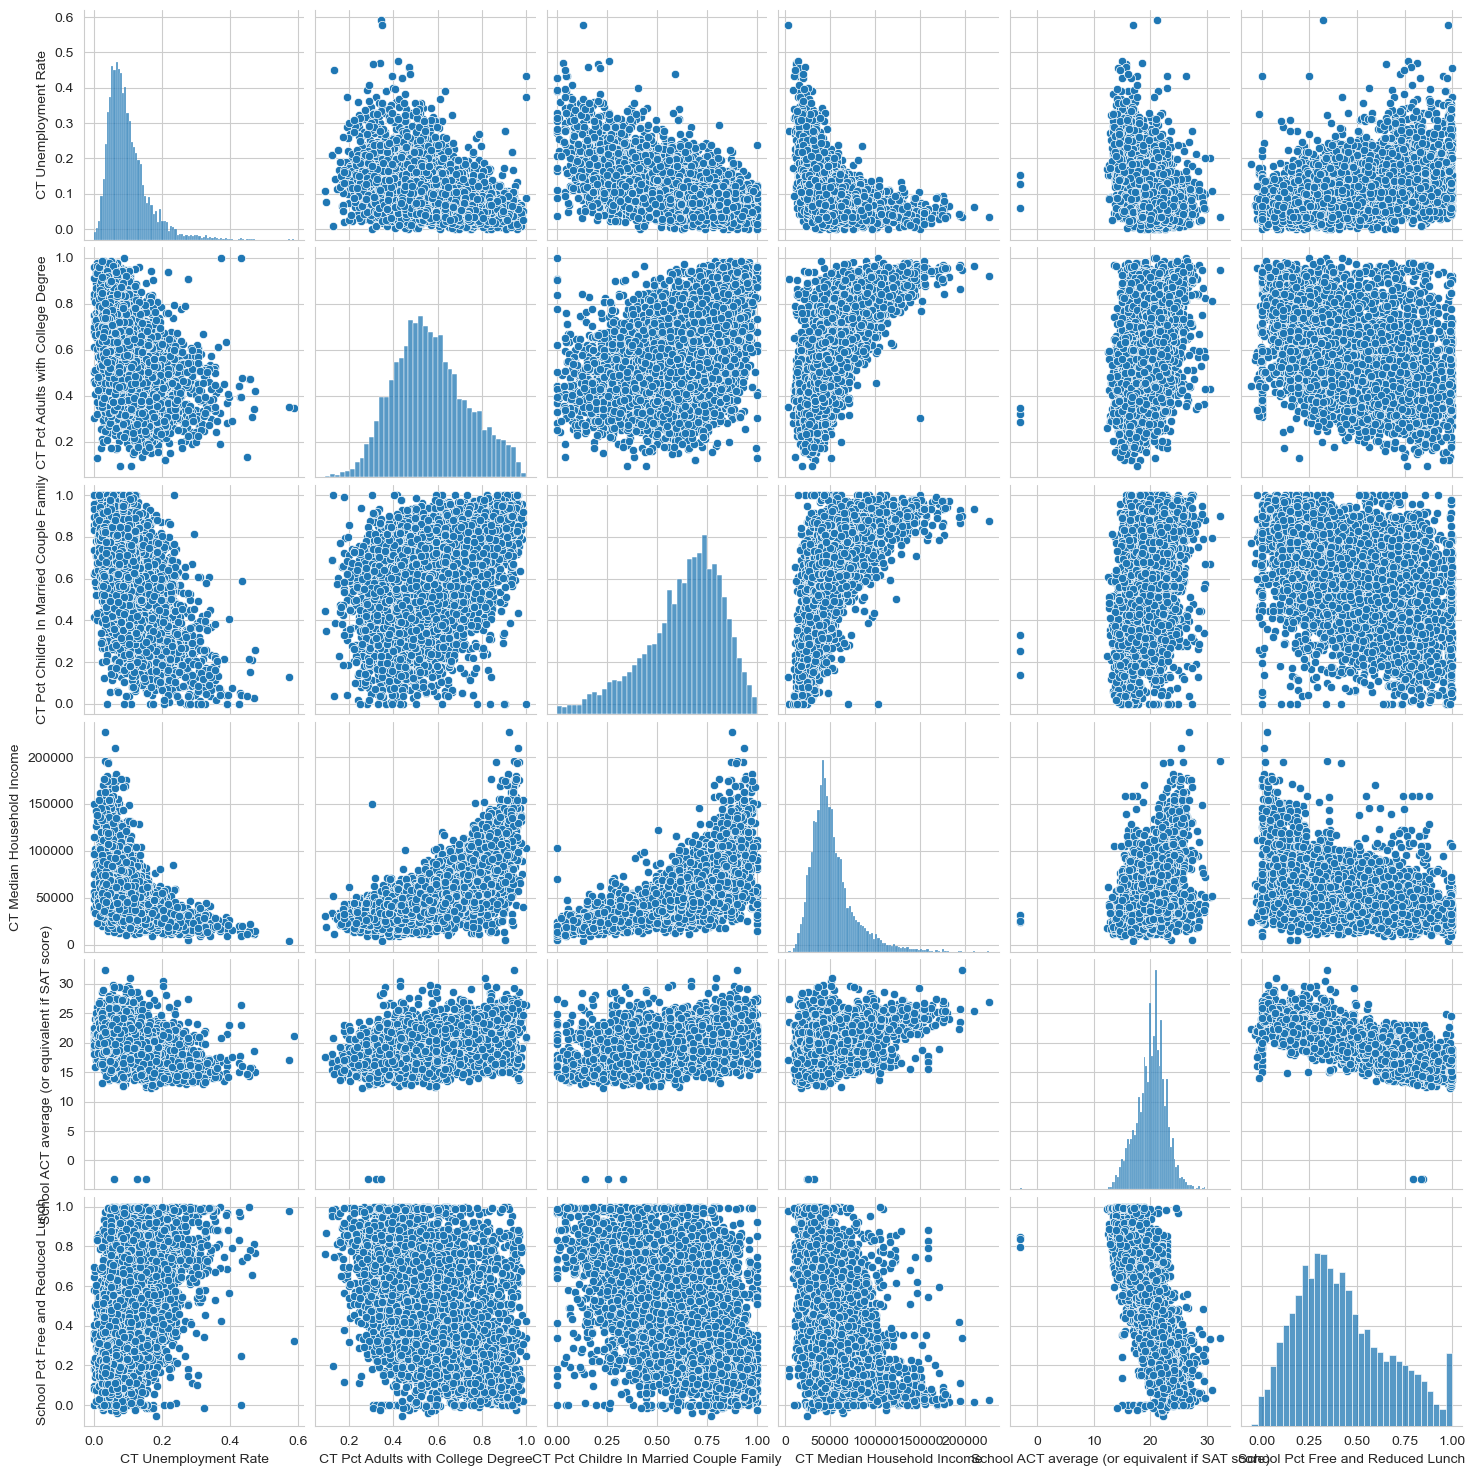

In [135]:
sns.pairplot(edgap.drop(columns="NCESSCH School ID"))
plt.show()

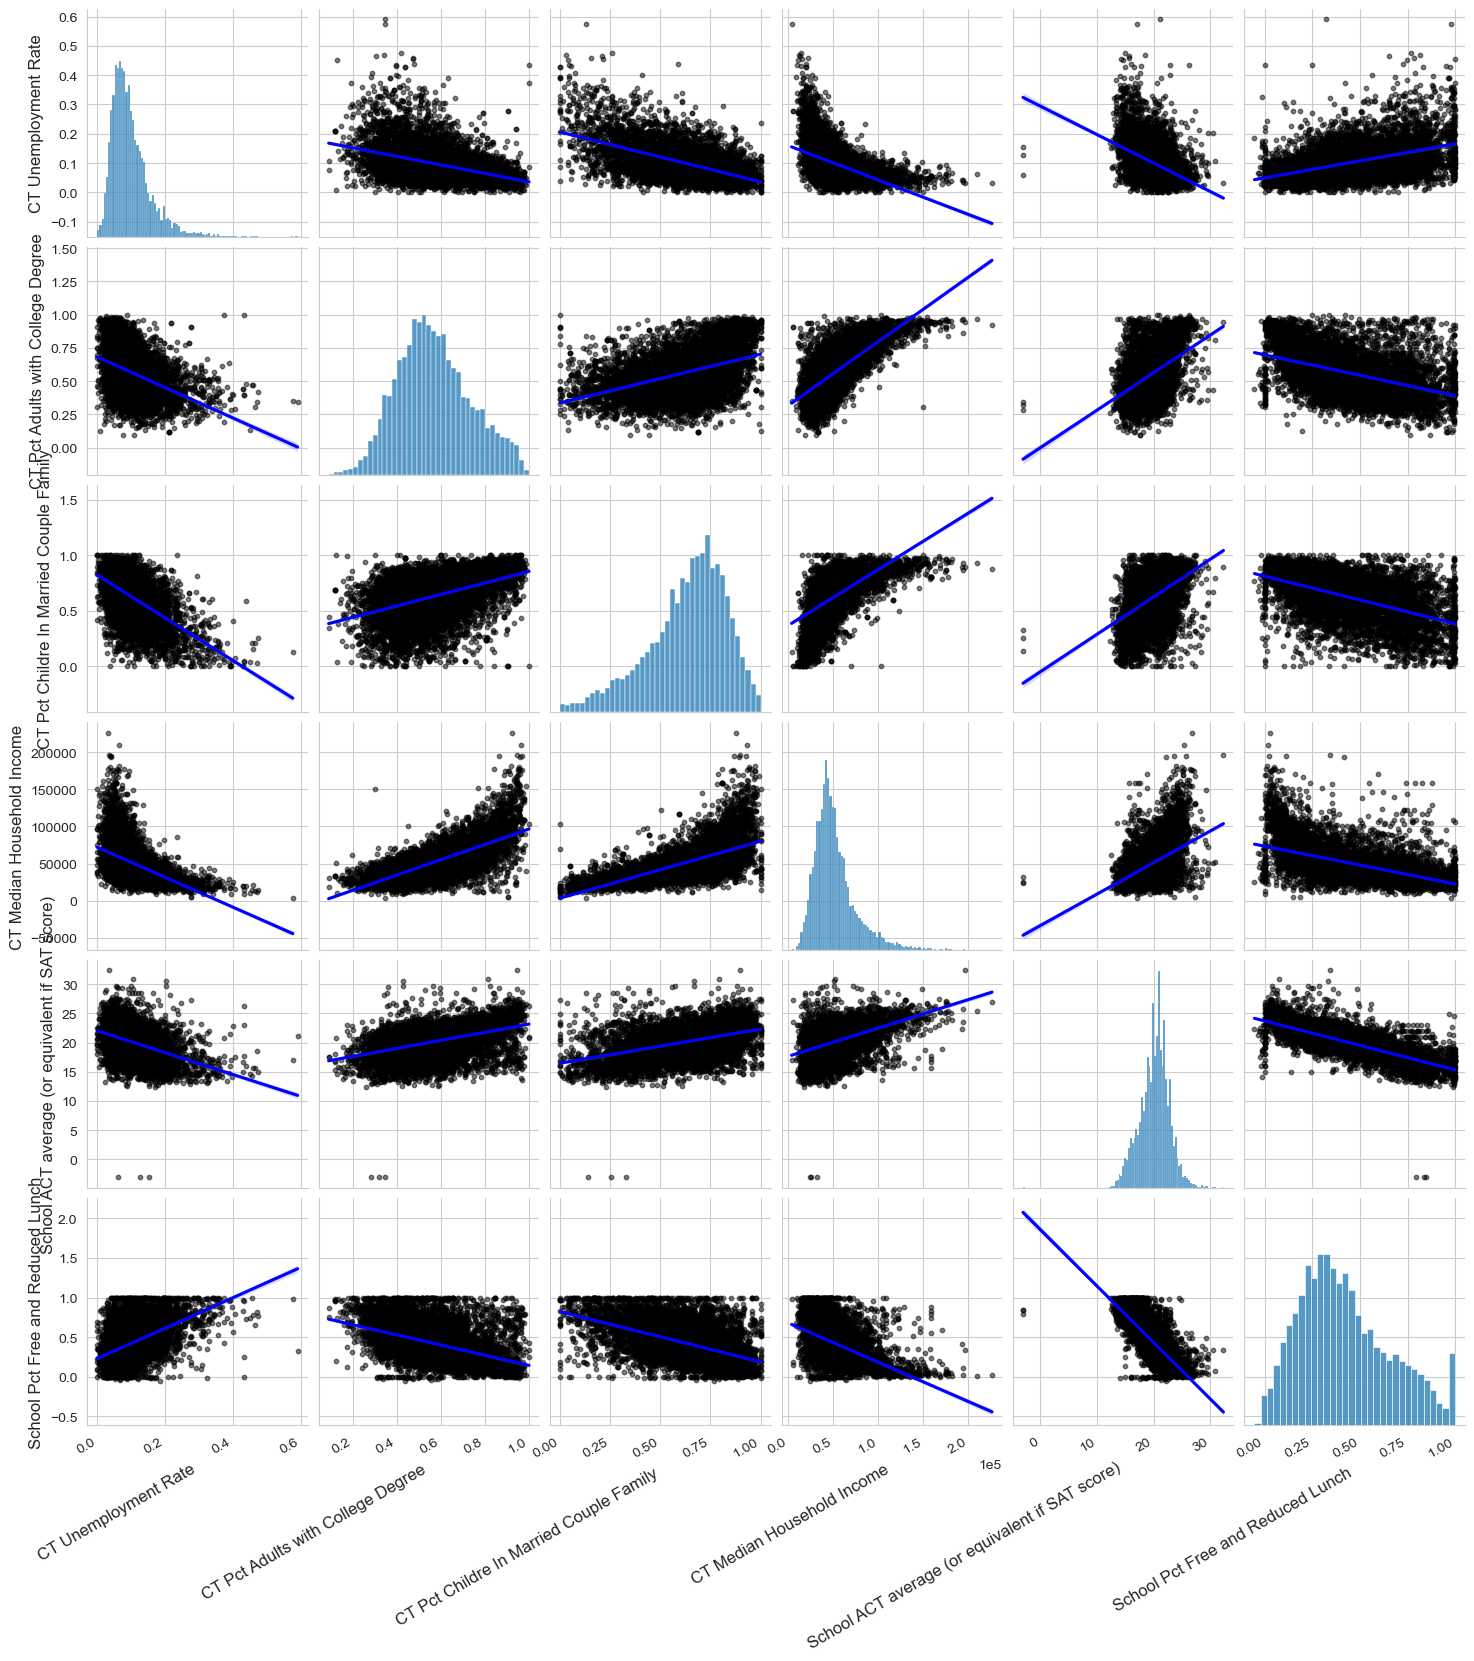

In [136]:
# Add regression lines to the pairplot

fig=sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"),
    kind="reg", 
    plot_kws={
        "line_kws": {"color": "blue"},
        "scatter_kws": {"alpha": 0.5,"color": "k","s":10},
        }
)
for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)
    ax.set_xlabel(ax.get_xlabel(), fontsize=12,rotation=30, ha='right')

    # Rotate x-axis labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()
    

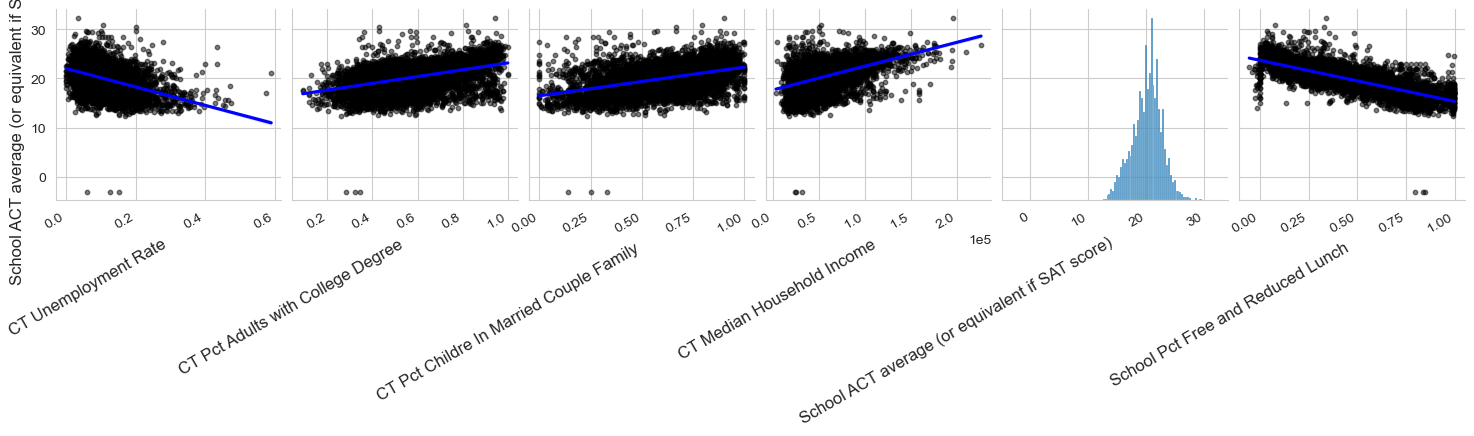

In [137]:
# Plot a single row of the pairplot

fig=sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"),
    y_vars=['School ACT average (or equivalent if SAT score)'],
    kind="reg", 
    plot_kws={
        "line_kws": {"color": "blue"},
        "scatter_kws": {"alpha": 0.5,"color": "k","s":10},
        }
)
for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)
    ax.set_xlabel(ax.get_xlabel(), fontsize=12,rotation=30, ha='right')

    # Rotate x-axis labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()
    

Observations

There appears to be a relationship between the socioeconomic variables and the ACT score.

There are some out-of-range ACT and percent lunch values that will need to be dealt with.

We should have confidence that it is worthwhile to spend time preparing the data for analysis.

#### Select relevant subsets of the data from school_infomation

In [138]:
school_information = school_information[['SCHOOL_YEAR','NCESSCH','LSTATE','LZIP','SCH_TYPE_TEXT','LEVEL','CHARTER_TEXT']]
school_information.head() 

,SCHOOL_YEAR,NCESSCH,LSTATE,LZIP,SCH_TYPE_TEXT,LEVEL,CHARTER_TEXT
0,2016-2017,1.000020e+10,AL,35220,Alternative School,High,No
1,2016-2017,1.000020e+10,AL,36067,Alternative School,High,No
2,2016-2017,1.000020e+10,AL,36784,Alternative School,High,No
3,2016-2017,1.000020e+10,AL,36057,Alternative School,High,No
4,2016-2017,1.000020e+10,AL,35206,Alternative School,High,No


#### Selecting  relevant columns from School staff dataset & School members dataset has already been done before loading to take care of the file size issue.

### Rename columns

In [139]:
edgap = edgap.rename(columns={
    'NCESSCH School ID':'id',
    'CT Unemployment Rate': 'rate_unemployment',
    'CT Pct Adults with College Degree': 'percent_college',
    'CT Pct Childre In Married Couple Family': 'percent_married',
    'CT Median Household Income': 'median_income',
    'School ACT average (or equivalent if SAT score)': 'average_act',
    'School Pct Free and Reduced Lunch': 'percent_lunch'
})
edgap.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [140]:
school_information= school_information.rename(columns={
    'SCHOOL_YEAR': 'year',
    'NCESSCH': 'id',
    'LSTATE': 'state',
    'LZIP': 'zipcode',
    'SCH_TYPE_TEXT': 'school_type',
    'LEVEL': 'school_level',
    'CHARTER_TEXT': 'charter_status'
})

school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            102183 non-null  object 
 1   id              102181 non-null  float64
 2   state           102183 non-null  object 
 3   zipcode         102183 non-null  object 
 4   school_type     102181 non-null  object 
 5   school_level    102179 non-null  object 
 6   charter_status  102179 non-null  object 
dtypes: float64(1), object(6)
memory usage: 5.5+ MB


In [141]:
school_staff= school_staff.rename(columns={
    'NCESSCH': 'id',
    'TEACHERS': 'teacher_count'
})
school_staff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100062 entries, 0 to 100061
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             100062 non-null  int64  
 1   teacher_count  96438 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 1.5 MB


In [142]:
school_members= school_members.rename(columns={
    'NCESSCH': 'id',
    'STUDENT_COUNT': 'student_count',
    'GRADE' :'grade'
})
school_members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12279594 entries, 0 to 12279593
Data columns (total 3 columns):
 #   Column         Dtype  
---  ------         -----  
 0   id             int64  
 1   student_count  float64
 2   grade          object 
dtypes: float64(1), int64(1), object(1)
memory usage: 281.1+ MB


Filtering only the students in grade 9,10,11,12 before merging

In [143]:
school_members = school_members[school_members['grade'].isin(['Grade 9', 'Grade 10', 'Grade 11', 'Grade 12'])]

# Group by school (NCESSCH) and sum the student counts
school_members = (
    school_members.groupby('id', as_index=False)['student_count']
      .sum()
)

print(school_members)

                 id  student_count
0       10000200277            0.0
1       10000201667            0.0
2       10000201670            0.0
3       10000201705            0.0
4       10000201706            0.0
...             ...            ...
34371  780000200007            0.0
34372  780000200013         2026.0
34373  780000200030         1944.0
34374  780003000005         2478.0
34375  780003000015         1866.0

[34376 rows x 2 columns]


Observations

We selected a subset of columns of the school information data set, school staff dataset and school members dataset.

We renamed the columns for clarity and to follow formatting guidelines.

We filtered only the Grade 9-12 students from school members data set.

We are ready to join the data frames.

### Ensuring matching data types for the key

#### Join Data frames

We want to join the DataFrames using the identity of the school as the key. The identity is given by the NCESSCH school identity.
The value is an object in the EdGap data set and a float64 in the school information data set.

We will cast the id column in the school_information DataFrame as an object.

In [144]:
school_information['id'] = school_information['id'].astype(object)
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   year            102183 non-null  object
 1   id              102181 non-null  object
 2   state           102183 non-null  object
 3   zipcode         102183 non-null  object
 4   school_type     102181 non-null  object
 5   school_level    102179 non-null  object
 6   charter_status  102179 non-null  object
dtypes: object(7)
memory usage: 5.5+ MB


In [145]:
df= edgap.merge(school_information, how='left', on='id')
df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zipcode,school_type,school_level,charter_status
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High,Yes
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High,No
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High,No
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High,No
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High,No


In [146]:
school_staff['id']=school_staff['id'].astype(object)
school_staff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100062 entries, 0 to 100061
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             100062 non-null  object 
 1   teacher_count  96438 non-null   float64
dtypes: float64(1), object(1)
memory usage: 1.5+ MB


In [147]:
school_members['id']=school_members['id'].astype(object)
school_members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34376 entries, 0 to 34375
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             34376 non-null  object 
 1   student_count  34376 non-null  float64
dtypes: float64(1), object(1)
memory usage: 537.3+ KB


#### Merge the school_staff data set and the school member data set for calculating the srudent teacher ratio.

In [148]:
df_student_teacher= school_staff.merge(school_members, how='outer', on='id')
df_student_teacher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100062 entries, 0 to 100061
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             100062 non-null  object 
 1   teacher_count  96438 non-null   float64
 2   student_count  34376 non-null   float64
dtypes: float64(2), object(1)
memory usage: 2.3+ MB


In [149]:
# Convert to numeric — invalid strings become NaN
df_student_teacher['student_count'] = pd.to_numeric(df_student_teacher['student_count'], errors='coerce')
df_student_teacher['teacher_count'] = pd.to_numeric(df_student_teacher['teacher_count'], errors='coerce')

# Replace invalid or impossible values (<= 0) with NaN
df_student_teacher.loc[df_student_teacher['student_count'] <= 0, 'student_count'] = np.nan
df_student_teacher.loc[df_student_teacher['teacher_count'] <= 0, 'teacher_count'] = np.nan

# Compute student-teacher ratio
df_student_teacher['student_teacher_ratio'] = (
    df_student_teacher['student_count'] / df_student_teacher['teacher_count']
)

# Replace infinite values with NaN
df_student_teacher['student_teacher_ratio'] = df_student_teacher['student_teacher_ratio'].replace([np.inf, -np.inf], np.nan)

# Ensure all numeric columns have only finite values (replace invalid ones with NaN)
numeric_cols = df_student_teacher.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    df_student_teacher[col] = df_student_teacher[col].apply(
        lambda x: np.nan if pd.isna(x) or not np.isfinite(x) else x
    )

# Final info summary
print("\nDataFrame info:")
df_student_teacher.info()


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100062 entries, 0 to 100061
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     100062 non-null  object 
 1   teacher_count          95287 non-null   float64
 2   student_count          26122 non-null   float64
 3   student_teacher_ratio  24644 non-null   float64
dtypes: float64(3), object(1)
memory usage: 3.1+ MB


 We notice that a lot of student teacher ratio have high ratio ranging from 100 to 13000. It is because many of the teacher column are not reported or less. So we are droping the rows where student teacher ratio is above 100.

In [150]:
df_student_teacher.drop(df_student_teacher[df_student_teacher['student_teacher_ratio'] > 100].index, inplace=True)

#### Merge the Edgap-school information dataframe to the student_teacher dataframe

In [151]:
df= df.merge(df_student_teacher, how='left', on='id')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     7986 non-null   object 
 1   rate_unemployment      7972 non-null   float64
 2   percent_college        7973 non-null   float64
 3   percent_married        7961 non-null   float64
 4   median_income          7966 non-null   float64
 5   average_act            7986 non-null   float64
 6   percent_lunch          7986 non-null   float64
 7   year                   7898 non-null   object 
 8   state                  7898 non-null   object 
 9   zipcode                7898 non-null   object 
 10  school_type            7898 non-null   object 
 11  school_level           7898 non-null   object 
 12  charter_status         7898 non-null   object 
 13  teacher_count          7833 non-null   float64
 14  student_count          7841 non-null   float64
 15  stud

Observations:

We joined the data sets using the school id as the key.

We first cast the id as an object to have the same data type for the key in each data set.

We used a left join to keep all EdGap data.

We then bifurcated the students from Grade 9-12.

We merged the student and teacher dataset with outer join to arrive at the student teacher ratio. 

This dataframe was then merged with Edgap-school_information dataframe using left join to keep all the Edgap data.

#### Quality control

In [152]:
df.select_dtypes(include=['number']).agg(['min', 'max']).round(2)

,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,teacher_count,student_count,student_teacher_ratio
min,0.00,0.09,0.0,3589.0,-3.07,-0.05,3.49,96.0,3.03
max,0.59,1.00,1.0,226181.0,32.36,1.00,570.10,23414.0,96.44


#### Set out of range values to NaN using np.nan

In [153]:
df.loc[df['percent_lunch'] < 0, 'percent_lunch'] = np.nan
df.loc[df['average_act'] < 1, 'average_act'] = np.nan

#### Check the types, levels,and charter status of schools

In [154]:
df['school_level'].value_counts()

school_level
High            7230
Other            631
Not reported      35
Elementary         2
Name: count, dtype: int64

In [155]:
df['school_type'].value_counts()

school_type
Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: count, dtype: int64

In [156]:
df['charter_status'].value_counts()

charter_status
No                7329
Yes                352
Not applicable     217
Name: count, dtype: int64

In [157]:
# Filtering for high schools
df=df.loc[df['school_level']=="High"]

In [158]:
# Check for duplicated rows
df.duplicated().sum()

0

In [159]:
# check for missing values
df.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,3
percent_lunch,20
year,0
state,0
zipcode,0


In [160]:
# Calculate the percentage of missing values for each column
percent_missing = df.isna().mean().round(4) *100
percent_missing.to_frame(name='Percent Missing Values')


,Percent Missing Values
id,0.00
rate_unemployment,0.17
percent_college,0.15
percent_married,0.28
median_income,0.22
average_act,0.04
percent_lunch,0.28
year,0.00
state,0.00
zipcode,0.00


### What states do we have data from

In [161]:
df['state'].value_counts()

state
TX    913
OH    654
IL    564
PA    543
MI    498
NC    407
FL    404
GA    367
WI    351
NJ    341
MO    337
IN    321
NY    295
TN    265
WA    263
MA    253
KY    198
LA    194
WY     38
DE     24
Name: count, dtype: int64

Observation:

We are missing a large amount of USA data due to omission.

This is not evident by examining NaN values in the data set.

We could obtain this information from public records, but we will not do that here.

In [162]:
# Drop the rows where the average ACT score is missing

df = df.dropna(subset=['average_act'])

# Check how many missing values remain in each column
df.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,0
percent_lunch,20
year,0
state,0
zipcode,0


Observations:

We set out-of-range values to NaN and will impute them.

We kept only high schools.

We removed schools where we do not have the ACT score.

Many schools are missing from the data by omission.

We will impute missing values of socioeconomic variables.


### Data imputation

In [163]:
# Define the predictor variables to be rate_unemployment, percent_college, percent_married,
# median_income, percent_lunch, state, and charter.

predictor_variables = [
    'rate_unemployment',
    'percent_college',
    'percent_married',
    'median_income',
    'percent_lunch',
    'state',
    'charter_status',
    'student_teacher_ratio'
]

In [164]:
# Use the iterative imputer to replace missing values in the columns corresponding
# to predictor variables in the analysis

from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()

In [165]:
# Fit the imputer using the numerical predictor variables 
# (this can include dummies for categorical variables).

# Define the columns you want to use in the imputation process
numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

print(numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch', 'student_teacher_ratio']


In [166]:
# Fit the imputer
imputer.fit(df.loc[:, numerical_predictors])

IterativeImputer()

In [167]:
# Impute the missing values in the training data
df.loc[:, numerical_predictors] = imputer.transform(df.loc[:, numerical_predictors])

In [168]:
df.isna().sum().to_frame(name='missing_values')

,missing_values
id,0
rate_unemployment,0
percent_college,0
percent_married,0
median_income,0
average_act,0
percent_lunch,0
year,0
state,0
zipcode,0


In [169]:
# Export the clean data set
df.to_csv(
    '../data/education_clean.csv',
    encoding='utf-8-sig',
    index=False
)

Summary

We used an iterative imputer to estimate missing values of numerical predictor variables.

We saved the clean data frame as a CSV file.